Stock Price Prediction

In [2]:
import numpy as np
import pandas as pd
import quandl as qd   #api for stock data
import math
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [3]:
#df = pd.read_csv("EOD-AAPL.csv",index_col=False)
df = qd.get('WIKI/'+'AAPL',start_date='1990-01-01',end_date='2018-03-01',api_key='4n3M2RYggsNbr3-yZpKo')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1990-01-02,35.25,37.50,35.00,37.25,1635700.0,0.0,1.0,1.058061,1.125597,1.050557,1.118093,45799600.0
1990-01-03,38.00,38.00,37.50,37.50,1857100.0,0.0,1.0,1.140605,1.140605,1.125597,1.125597,51998800.0
1990-01-04,38.25,38.75,37.25,37.63,1977800.0,0.0,1.0,1.148109,1.163117,1.118093,1.129499,55378400.0
1990-01-05,37.75,38.25,37.00,37.75,1101000.0,0.0,1.0,1.133101,1.148109,1.110589,1.133101,30828000.0
1990-01-08,37.50,38.00,37.00,38.00,906900.0,0.0,1.0,1.125597,1.140605,1.110589,1.140605,25393200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7095 entries, 1990-01-02 to 2018-03-01
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         7095 non-null   float64
 1   High         7095 non-null   float64
 2   Low          7095 non-null   float64
 3   Close        7095 non-null   float64
 4   Volume       7095 non-null   float64
 5   Ex-Dividend  7095 non-null   float64
 6   Split Ratio  7095 non-null   float64
 7   Adj. Open    7095 non-null   float64
 8   Adj. High    7095 non-null   float64
 9   Adj. Low     7095 non-null   float64
 10  Adj. Close   7095 non-null   float64
 11  Adj. Volume  7095 non-null   float64
dtypes: float64(12)
memory usage: 720.6 KB


In [5]:
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

In [6]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
1990-01-02,35.25,37.50,35.00,37.25,1635700.0,0.0,1.0,1.058061,1.125597,1.050557,1.118093,45799600.0,6.711409,5.673759
1990-01-03,38.00,38.00,37.50,37.50,1857100.0,0.0,1.0,1.140605,1.140605,1.125597,1.125597,51998800.0,1.333333,-1.315789
1990-01-04,38.25,38.75,37.25,37.63,1977800.0,0.0,1.0,1.148109,1.163117,1.118093,1.129499,55378400.0,3.986181,-1.620915
1990-01-05,37.75,38.25,37.00,37.75,1101000.0,0.0,1.0,1.133101,1.148109,1.110589,1.133101,30828000.0,3.311258,0.000000
1990-01-08,37.50,38.00,37.00,38.00,906900.0,0.0,1.0,1.125597,1.140605,1.110589,1.140605,25393200.0,2.631579,1.333333


In [7]:
#label: future price
df.corr()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Open,1.000000,0.999925,0.999895,0.999816,0.203593,0.085407,-0.004306,0.489666,0.489986,0.488696,0.489248,0.110581,-0.324995,-0.014071
High,0.999925,1.000000,0.999874,0.999916,0.204826,0.085018,-0.004240,0.488524,0.488921,0.487583,0.488197,0.113445,-0.321230,-0.008306
Low,0.999895,0.999874,1.000000,0.999909,0.201255,0.085377,-0.004268,0.491010,0.491358,0.490149,0.490696,0.106271,-0.330636,-0.008017
Close,0.999816,0.999916,0.999909,1.000000,0.203069,0.085058,-0.004157,0.489726,0.490136,0.488859,0.489498,0.109967,-0.325913,-0.002553
Volume,0.203593,0.204826,0.201255,0.203069,1.000000,0.005049,0.037505,0.561738,0.563853,0.558589,0.561041,0.484340,-0.058074,-0.013236
Ex-Dividend,0.085407,0.085018,0.085377,0.085058,0.005049,1.000000,-0.000713,0.049492,0.049298,0.049333,0.049217,-0.012982,-0.031684,-0.005282
Split Ratio,-0.004306,-0.004240,-0.004268,-0.004157,0.037505,-0.000713,1.000000,0.014029,0.014147,0.013998,0.014301,-0.004967,0.001590,0.013882
Adj. Open,0.489666,0.488524,0.491010,0.489726,0.561738,0.049492,0.014029,1.000000,0.999953,0.999939,0.999895,-0.167936,-0.422130,-0.004336
Adj. High,0.489986,0.488921,0.491358,0.490136,0.563853,0.049298,0.014147,0.999953,1.000000,0.999923,0.999951,-0.166588,-0.420556,-0.001572
Adj. Low,0.488696,0.487583,0.490149,0.488859,0.558589,0.049333,0.013998,0.999939,0.999923,1.000000,0.999951,-0.170186,-0.424611,-0.001288


ADJUSTED CLOSE

<function matplotlib.pyplot.show(*args, **kw)>

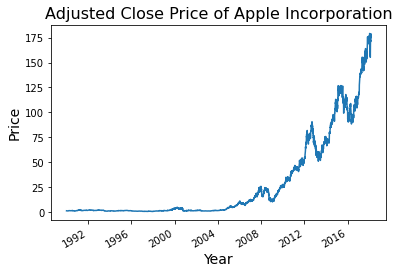

In [8]:
%matplotlib inline
df['Adj. Close'].plot()
plt.title("Adjusted Close Price of Apple Incorporation", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show

Create trading strategies and analyze the performance

In [9]:
df = df.drop(['Open','High','Low','Close','Volume','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low'],axis=1)
df.head()


,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,
1990-01-02,1.118093,45799600.0,6.711409,5.673759
1990-01-03,1.125597,51998800.0,1.333333,-1.315789
1990-01-04,1.129499,55378400.0,3.986181,-1.620915
1990-01-05,1.133101,30828000.0,3.311258,0.000000
1990-01-08,1.140605,25393200.0,2.631579,1.333333


In [10]:
df = df.fillna(-99999)

In [11]:
df.isnull().sum()

Adj. Close     0
Adj. Volume    0
HL_PCT         0
PCT_change     0
dtype: int64

In [12]:
dfnew = df[['Adj. Close','HL_PCT','PCT_change']]
dfnew.head()

,Adj. Close,HL_PCT,PCT_change
Date,,,
1990-01-02,1.118093,6.711409,5.673759
1990-01-03,1.125597,1.333333,-1.315789
1990-01-04,1.129499,3.986181,-1.620915
1990-01-05,1.133101,3.311258,0.000000
1990-01-08,1.140605,2.631579,1.333333


In [14]:
#Shifting date
ind = pd.date_range('01/01/2021', periods = dfnew.shape[0], freq ='24H')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2040-05-26', '2040-05-27', '2040-05-28', '2040-05-29',
               '2040-05-30', '2040-05-31', '2040-06-01', '2040-06-02',
               '2040-06-03', '2040-06-04'],
              dtype='datetime64[ns]', length=7095, freq='24H')

In [16]:
dfnew['label'] = ind

,Adj. Close,HL_PCT,PCT_change,label
Date,,,,
1990-01-02,1.118093,6.711409,5.673759,2021-01-01
1990-01-03,1.125597,1.333333,-1.315789,2021-01-02
1990-01-04,1.129499,3.986181,-1.620915,2021-01-03
1990-01-05,1.133101,3.311258,0.000000,2021-01-04
1990-01-08,1.140605,2.631579,1.333333,2021-01-05


In [17]:
dfnew.tail()

,Adj. Close,HL_PCT,PCT_change,label
Date,,,,
2018-02-23,175.555,1.201903,1.085392,2040-05-31
2018-02-26,178.970,1.776834,1.485682,2040-06-01
2018-02-27,178.390,1.300521,-0.396427,2040-06-02
2018-02-28,178.120,1.440040,-0.635948,2040-06-03
2018-03-01,175.000,4.065714,-1.982749,2040-06-04
